# DATA CLEANING :-

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dc= pd.read_csv("warehouse_messy_data.csv")

# 1. Backup file

In [3]:
df= dc.copy()

# 2. Understand the Data

In [4]:
df

,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked
0,1102,gadget y,ELECTRONICS,Warehouse 2,Aisle 1,300,9.99,Supplier C,In Stock,NaN
1,1435,gadget y,ELECTRONICS,Warehouse 2,Aisle 4,two hundred,19.99,Supplier C,Out of Stock,NaN
2,1860,widget a,CLOTHING,Warehouse 2,Aisle 3,100,19.99,Supplier B,In Stock,20/12/2022
3,1270,gadget z,TOYS,Warehouse 2,Aisle 4,50,49.99,Supplier B,In Stock,20/12/2022
4,1106,widget a,FURNITURE,Warehouse 3,Aisle 3,two hundred,9.99,Supplier D,Out of Stock,25/04/2023
...,...,...,...,...,...,...,...,...,...,...
995,1009,widget b,FURNITURE,Warehouse 2,Aisle 2,100,NaN,Supplier C,In Stock,15/01/2023
996,1823,gadget y,ELECTRONICS,Warehouse 2,Aisle 3,300,19.99,Supplier B,In Stock,20/12/2022
997,1797,gadget z,TOYS,Warehouse 3,Aisle 5,150,9.99,Supplier C,Low Stock,05/03/2023
998,1241,widget c,FURNITURE,Warehouse 2,Aisle 2,100,49.99,Supplier C,Low Stock,20/12/2022


In [5]:
df.shape

(1000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product ID      1000 non-null   int64  
 1   Product Name    1000 non-null   object 
 2   Category        1000 non-null   object 
 3   Warehouse       1000 non-null   object 
 4   Location        1000 non-null   object 
 5   Quantity        842 non-null    object 
 6   Price           793 non-null    float64
 7   Supplier        1000 non-null   object 
 8   Status          1000 non-null   object 
 9   Last Restocked  800 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 78.3+ KB


In [7]:
df.describe()

,Product ID,Price
count,1000.000000,793.000000
mean,1503.929000,28.085839
std,289.998108,14.686312
min,1000.000000,9.990000
25%,1242.750000,19.990000
50%,1505.000000,29.990000
75%,1757.250000,49.990000
max,1998.000000,49.990000


# 3. Fixing Formate of Column

In [8]:
df.columns= df.columns.str.strip().str.lower().str.replace(" ","_")

# 4. Handling Null Values and Replace Values

In [9]:
df.isnull().sum()

product_id          0
product_name        0
category            0
warehouse           0
location            0
quantity          158
price             207
supplier            0
status              0
last_restocked    200
dtype: int64

In [10]:
df["quantity"]= df["quantity"].str.strip()
df["quantity"]= df["quantity"].replace("two hundred",200)

In [11]:
df["quantity"]= df["quantity"].fillna(0)

In [12]:
df["price"] = df["price"].fillna(
    df.groupby("category")["price"].transform("median")
).round(2)

# 5. Fixing Data Types

In [13]:
df.dtypes

product_id          int64
product_name       object
category           object
warehouse          object
location           object
quantity           object
price             float64
supplier           object
status             object
last_restocked     object
dtype: object

In [14]:
df["quantity"]= df["quantity"].astype(int)
df["product_id"]= df["product_id"].astype(int)
df["price"]= df["price"].astype(float)
df["last_restocked"]= pd.to_datetime(df["last_restocked"],errors="coerce",dayfirst=True)

# 6. Fixing Data Formate and Split Values

In [15]:
columns = ["product_name","category","warehouse","location","supplier","status"]

for col in columns:
    df[col] = df[col].astype(str).str.strip().str.capitalize()
    
df["product_name"] = df["product_name"].str.title()
df["supplier"] = df["supplier"].str.title()

In [16]:
df= df.sort_values(by="product_id",ascending=True)
df= df.reset_index()

In [17]:
df["status"] = np.where(
    df["quantity"] == 0,"Out-of-Stock",
    np.where(df["quantity"] <= 100, "Low-Stock", "In-Stock")
)

In [18]:
df["product_name"]= df["product_name"].str.replace(" ","-", regex= False)
df["warehouse"]= df["warehouse"].str.replace(" ","-", regex= False)
df["location"]= df["location"].str.replace(" ","-", regex= False)
df["supplier"]= df["supplier"].str.replace(" ","-", regex= False)

# 7. Handling Duplicates

In [19]:
df[df.duplicated()]

,index,product_id,product_name,category,warehouse,location,quantity,price,supplier,status,last_restocked


In [20]:
df= df.drop_duplicates()

# 8. Add and Remove columns

In [21]:
df= df.drop("index",axis= 1)

In [22]:
df["total_inventory_purchase"]= df["price"] * df["quantity"]

In [23]:
df.head()

,product_id,product_name,category,warehouse,location,quantity,price,supplier,status,last_restocked,total_inventory_purchase
0,1000,Gadget-Y,Furniture,Warehouse-1,Aisle-2,100,49.99,Supplier-C,Low-Stock,2023-01-15,4999.0
1,1001,Widget-A,Furniture,Warehouse-2,Aisle-5,300,19.99,Supplier-A,In-Stock,NaT,5997.0
2,1001,Gadget-X,Toys,Warehouse-3,Aisle-3,150,19.99,Supplier-C,In-Stock,2023-04-25,2998.5
3,1001,Gadget-Y,Furniture,Warehouse-1,Aisle-5,200,49.99,Supplier-C,In-Stock,2022-12-20,9998.0
4,1004,Gadget-Z,Clothing,Warehouse-1,Aisle-3,50,19.99,Supplier-B,Low-Stock,NaT,999.5


# 9. Outliers Detection

In [43]:
# creating a function for outliers because it is reusable
def outliers(df, Column_name):
    Q1= df[Column_name].quantile(0.25)
    Q3= df[Column_name].quantile(0.75)

    IQR= Q3-Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    Out=  df[
        (df[Column_name] < lower_bound) | (df[Column_name] > upper_bound)
    ][Column_name]
    return Out

## --> Outliers in Quantity

In [44]:
a= outliers(df, "quantity")

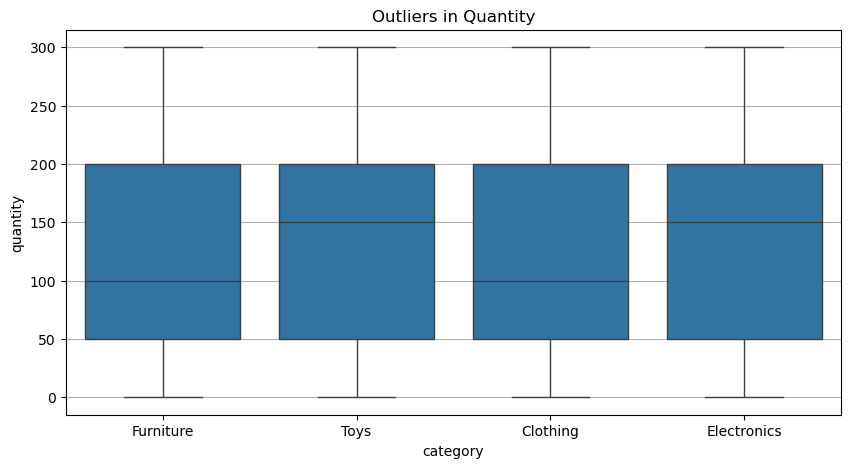

In [46]:
plt.figure(figsize= (10,5))
sns.boxplot(x= "category",y= "quantity", data= df)
plt.title("Outliers in Quantity")
plt.grid(axis= 'y')
plt.show()

## --> Outliers in Price

In [26]:
outliers("price")`

0      49.99
3      49.99
8      49.99
15     49.99
24     49.99
       ...  
970    49.99
976    49.99
980    49.99
986    49.99
989    49.99
Name: price, Length: 204, dtype: float64

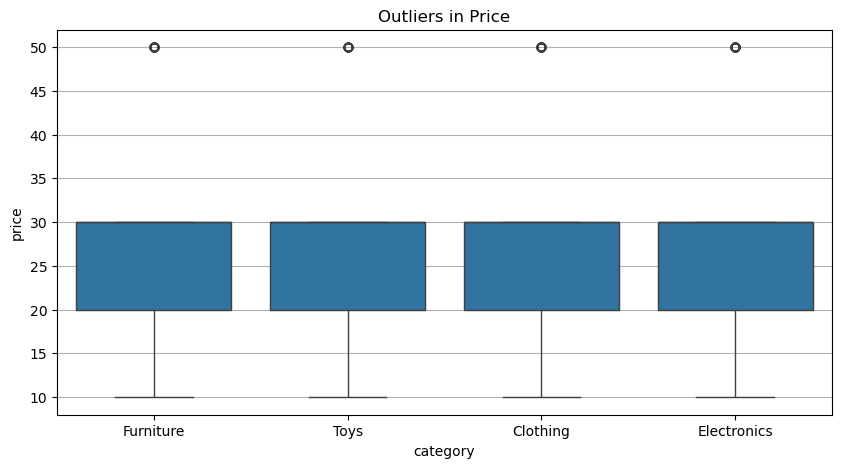

In [50]:
plt.figure(figsize= (10,5))
sns.boxplot(x= "category",y= "price", data= df)
plt.title("Outliers in Price")
plt.grid(axis= 'y')
plt.show()

## --> Outliers in Total Purchase

In [27]:
outliers("total_inventory_purchase")

59     14997.0
69     14997.0
86     14997.0
91     14997.0
93     14997.0
98     14997.0
141    14997.0
179    14997.0
192    14997.0
212    14997.0
239    14997.0
358    14997.0
397    14997.0
432    14997.0
445    14997.0
466    14997.0
520    14997.0
534    14997.0
558    14997.0
573    14997.0
577    14997.0
601    14997.0
633    14997.0
645    14997.0
666    14997.0
683    14997.0
739    14997.0
772    14997.0
779    14997.0
800    14997.0
848    14997.0
885    14997.0
893    14997.0
907    14997.0
908    14997.0
989    14997.0
Name: total_inventory_purchase, dtype: float64

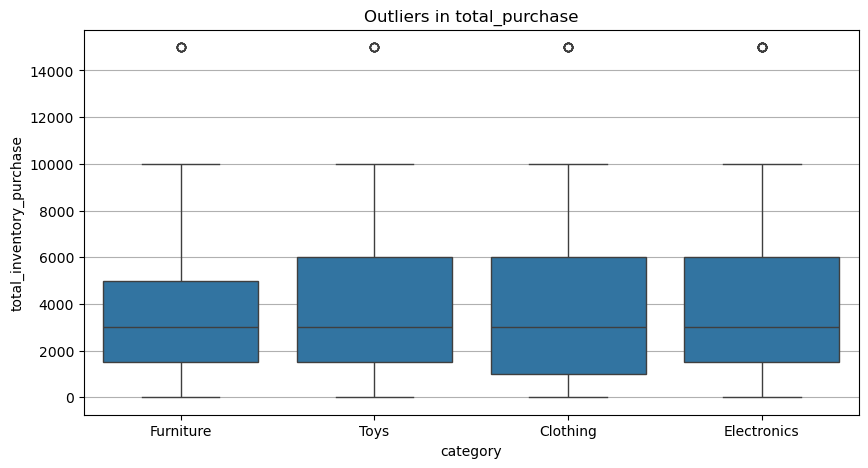

In [51]:
plt.figure(figsize= (10,5))
sns.boxplot(x= "category",y= "total_inventory_purchase", data= df)
plt.title("Outliers in total_purchase")
plt.grid(axis= 'y')
plt.show()

## --> Formula to remove outliers (if needed)

In [ ]:
# for removing outliers
# def remove_outliers(df, Column_name):
    # Q1 = df[Column_name].quantile(0.25)
    # Q3 = df[Column_name].quantile(0.75)

    # IQR = Q3 - Q1

    # lower_bound = Q1 - 1.5 * IQR
    # upper_bound = Q3 + 1.5 * IQR

    # # Keep only non-outliers
    # clean_df = df[
    #     (df[Column_name] >= lower_bound) &
    #     (df[Column_name] <= upper_bound)
    # ]

    # return clean_df

In [49]:
df

,product_id,product_name,category,warehouse,location,quantity,price,supplier,status,last_restocked,total_inventory_purchase
0,1000,Gadget-Y,Furniture,Warehouse-1,Aisle-2,100,49.99,Supplier-C,Low-Stock,2023-01-15,4999.0
1,1001,Widget-A,Furniture,Warehouse-2,Aisle-5,300,19.99,Supplier-A,In-Stock,NaT,5997.0
2,1001,Gadget-X,Toys,Warehouse-3,Aisle-3,150,19.99,Supplier-C,In-Stock,2023-04-25,2998.5
3,1001,Gadget-Y,Furniture,Warehouse-1,Aisle-5,200,49.99,Supplier-C,In-Stock,2022-12-20,9998.0
4,1004,Gadget-Z,Clothing,Warehouse-1,Aisle-3,50,19.99,Supplier-B,Low-Stock,NaT,999.5
...,...,...,...,...,...,...,...,...,...,...,...
995,1995,Widget-B,Clothing,Warehouse-2,Aisle-3,0,29.99,Supplier-B,Out-of-Stock,NaT,0.0
996,1996,Widget-B,Furniture,Warehouse-3,Aisle-2,100,19.99,Supplier-C,Low-Stock,2022-12-20,1999.0
997,1996,Widget-B,Electronics,Warehouse-3,Aisle-1,200,9.99,Supplier-A,In-Stock,2023-01-15,1998.0
998,1998,Gadget-Y,Electronics,Warehouse-3,Aisle-3,0,29.99,Supplier-B,Out-of-Stock,2023-03-05,0.0


# 10. Final Validation

In [29]:
df.isnull().sum()

product_id                    0
product_name                  0
category                      0
warehouse                     0
location                      0
quantity                      0
price                         0
supplier                      0
status                        0
last_restocked              200
total_inventory_purchase      0
dtype: int64

In [30]:
df.dtypes

product_id                           int64
product_name                        object
category                            object
warehouse                           object
location                            object
quantity                             int64
price                              float64
supplier                            object
status                              object
last_restocked              datetime64[ns]
total_inventory_purchase           float64
dtype: object

In [31]:
df.duplicated().sum()

np.int64(0)

In [32]:
df.head(20)

,product_id,product_name,category,warehouse,location,quantity,price,supplier,status,last_restocked,total_inventory_purchase
0,1000,Gadget-Y,Furniture,Warehouse-1,Aisle-2,100,49.99,Supplier-C,Low-Stock,2023-01-15,4999.0
1,1001,Widget-A,Furniture,Warehouse-2,Aisle-5,300,19.99,Supplier-A,In-Stock,NaT,5997.0
2,1001,Gadget-X,Toys,Warehouse-3,Aisle-3,150,19.99,Supplier-C,In-Stock,2023-04-25,2998.5
3,1001,Gadget-Y,Furniture,Warehouse-1,Aisle-5,200,49.99,Supplier-C,In-Stock,2022-12-20,9998.0
4,1004,Gadget-Z,Clothing,Warehouse-1,Aisle-3,50,19.99,Supplier-B,Low-Stock,NaT,999.5
5,1004,Gadget-Y,Clothing,Warehouse-3,Aisle-3,300,29.99,Supplier-A,In-Stock,2023-03-05,8997.0
6,1007,Gadget-Y,Furniture,Warehouse-1,Aisle-4,150,9.99,Supplier-A,In-Stock,2023-04-25,1498.5
7,1008,Widget-A,Toys,Warehouse-1,Aisle-5,0,29.99,Supplier-C,Out-of-Stock,2022-12-20,0.0
8,1008,Gadget-Z,Electronics,Warehouse-2,Aisle-1,100,49.99,Supplier-A,Low-Stock,NaT,4999.0
9,1009,Widget-B,Furniture,Warehouse-2,Aisle-2,100,29.99,Supplier-C,Low-Stock,2023-01-15,2999.0


# 11. Data Export

In [33]:
df.to_csv("clean_warehouse_data.csv")